In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve

In [26]:
from config_vars import categoricas

In [27]:
file = '../data/datos_preprocesados.csv'

df = pd.read_csv(file, sep=",")

In [28]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [29]:
y = df["fraud_bool"]

In [30]:
y

0          0
1          0
2          0
3          0
4          0
          ..
3999995    0
3999996    0
3999997    0
3999998    0
3999999    0
Name: fraud_bool, Length: 4000000, dtype: int64

In [31]:
X = df

In [32]:
X.drop(columns = ["fraud_bool"], inplace = True)

In [33]:
X

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,0.9,0.296803,-1,99,50,0.029718,-0.660974,AC,940,5924.901950,...,0,200.0,0,INTERNET,13.295473,windows,0,1,0,7
3999996,0.5,0.087615,-1,162,60,2.110916,-1.465277,AC,942,3414.506107,...,0,500.0,0,INTERNET,5.904327,windows,0,1,0,7
3999997,0.8,0.740167,138,12,30,18.470612,-1.118478,AB,353,4338.021791,...,0,200.0,0,INTERNET,4.184912,windows,0,1,0,7
3999998,0.9,0.377040,-1,38,30,0.022148,-1.170191,AB,1243,3968.642654,...,0,1500.0,0,INTERNET,7.263938,linux,1,1,0,7


In [34]:
#Convertir variables categóricas a numéricas usando One-Hot Encoding
X = pd.get_dummies(X, columns = categoricas, drop_first = False).astype(float)

In [35]:
#Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify = y)

In [36]:
#Entrenar el modelo Gradient Boosting Classifier con ajustes de hiperparámetros
model = XGBClassifier(n_estimators=300, scale_pos_weight=99)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
#Evaluar el modelo en los datos de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy*100:.2f}%')

Accuracy del modelo: 88.53%


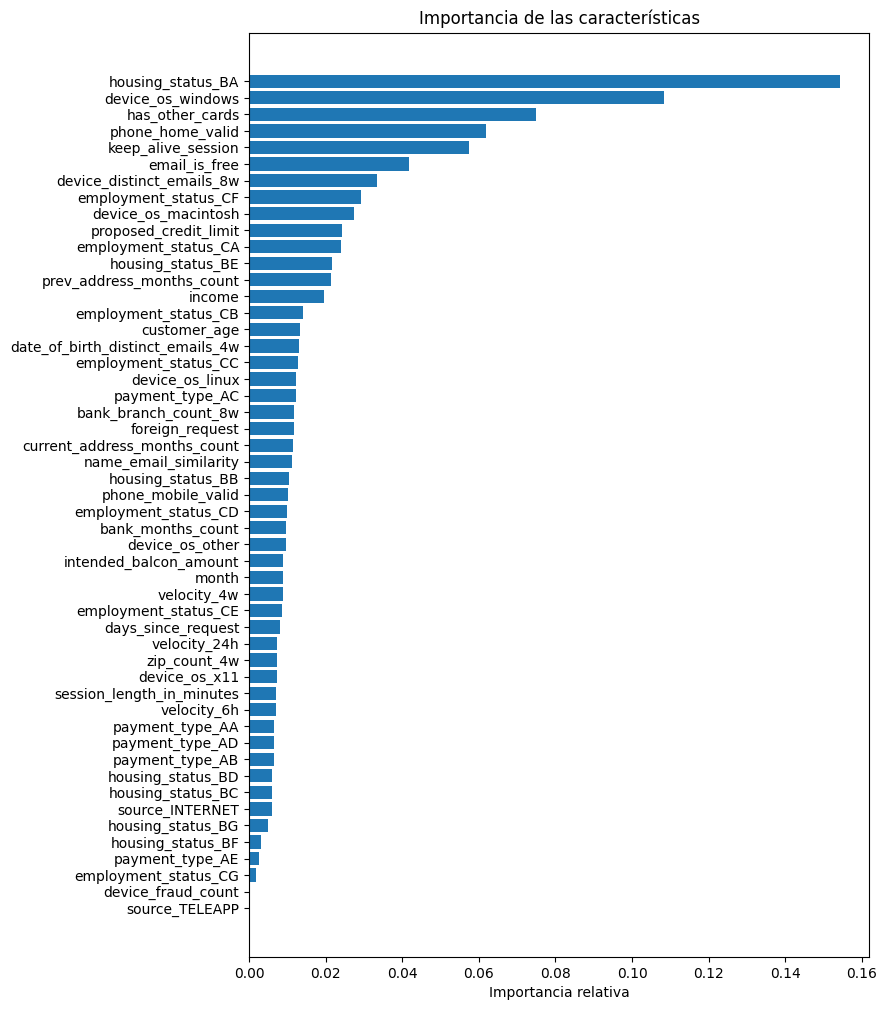

In [38]:
#Importancia de características
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,12))
plt.title('Importancia de las características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

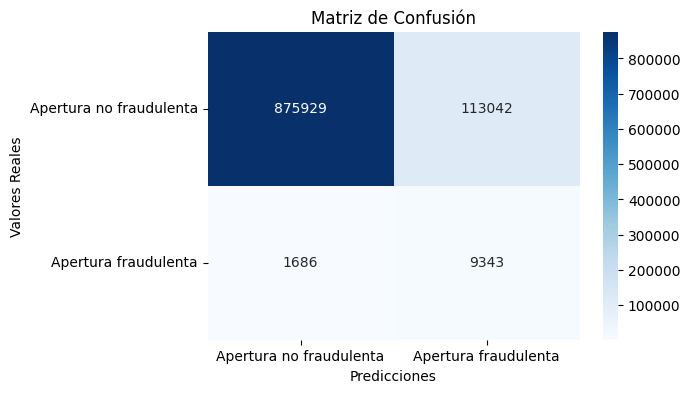

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Apertura no fraudulenta', 'Apertura fraudulenta']\
            , yticklabels=['Apertura no fraudulenta', 'Apertura fraudulenta'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [40]:
# Imprimir el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['Apertura no fraudulenta', 'Apertura fraudulenta'])
print(report)

                         precision    recall  f1-score   support

Apertura no fraudulenta       1.00      0.89      0.94    988971
   Apertura fraudulenta       0.08      0.85      0.14     11029

               accuracy                           0.89   1000000
              macro avg       0.54      0.87      0.54   1000000
           weighted avg       0.99      0.89      0.93   1000000



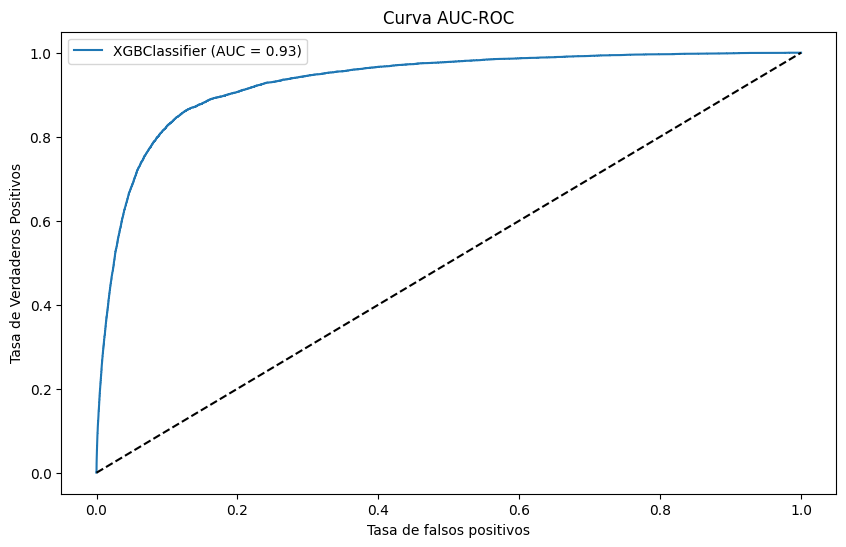

In [41]:
#AUC-ROC
from sklearn.metrics import roc_curve, roc_auc_score

#Probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]

#ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

#AUC
auc = roc_auc_score(y_test, y_prob)

#Gráfico
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBClassifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva AUC-ROC')
plt.legend()
plt.show()

In [42]:
# Calcular Precision, Recall y Umbrales para la Curva PR
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [43]:
# Calcular F1-score para cada umbral
# Añadimos un pequeño epsilon para evitar división por cero si precision + recall es 0
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
# Encontrar el umbral que maximiza el F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold_f1 = thresholds[optimal_idx]

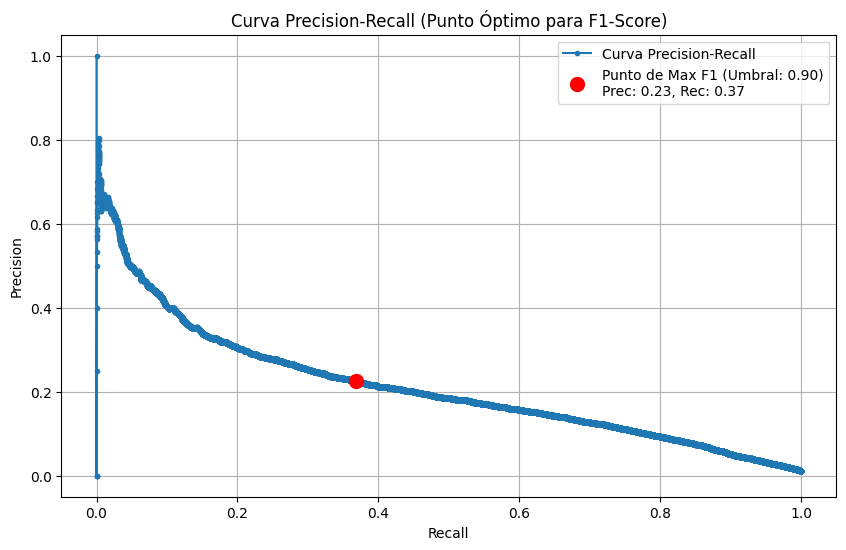

In [44]:
# --- Gráfico de la Curva Precision-Recall ---
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.plot(recall[optimal_idx], precision[optimal_idx], 'o', markersize=10, color='red',
        label=f'Punto de Max F1 (Umbral: {optimal_threshold_f1:.2f})\nPrec: {precision[optimal_idx]:.2f}, Rec: {recall[optimal_idx]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Punto Óptimo para F1-Score)')
plt.grid(True)
plt.legend()
plt.show()

In [45]:
y_pred_ajustado = (y_prob >= 0.6).astype(int)
accuracy_ajustado = accuracy_score(y_test, y_pred_ajustado)
accuracy_ajustado

0.913809

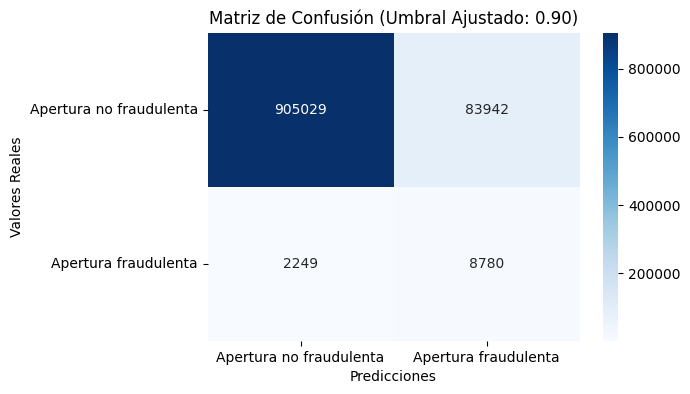

In [46]:
conf_matrix_ajustada = confusion_matrix(y_test, y_pred_ajustado)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_ajustada, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Apertura no fraudulenta', 'Apertura fraudulenta'],
            yticklabels=['Apertura no fraudulenta', 'Apertura fraudulenta'])
plt.title(f'Matriz de Confusión (Umbral Ajustado: {optimal_threshold_f1:.2f})')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [47]:
report_ajustado = classification_report(y_test, y_pred_ajustado,
                                        target_names=['Apertura no fraudulenta', 'Apertura fraudulenta'])
print(report_ajustado)

                         precision    recall  f1-score   support

Apertura no fraudulenta       1.00      0.92      0.95    988971
   Apertura fraudulenta       0.09      0.80      0.17     11029

               accuracy                           0.91   1000000
              macro avg       0.55      0.86      0.56   1000000
           weighted avg       0.99      0.91      0.95   1000000



In [48]:
X[y == 1].head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG
43,0.9,0.570800,-1.0,157.0,60.0,0.005908,35.337538,4079.0,8139.265753,4312.230612,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.1,0.993219,-1.0,67.0,20.0,0.015331,92.120139,1192.0,8330.727428,6708.346918,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.8,0.794351,-1.0,376.0,60.0,17.925951,41.422110,815.0,9747.407396,6902.019628,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
314,0.7,0.090000,-1.0,58.0,50.0,0.004134,-1.244047,4011.0,8036.901841,5794.624929,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
561,0.9,0.998248,31.0,45.0,30.0,0.010165,33.067538,525.0,6883.814598,3655.042385,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X[y == 1].head(15)

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG
43,0.9,0.570800,-1.0,157.0,60.0,0.005908,35.337538,4079.0,8139.265753,4312.230612,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.1,0.993219,-1.0,67.0,20.0,0.015331,92.120139,1192.0,8330.727428,6708.346918,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.8,0.794351,-1.0,376.0,60.0,17.925951,41.422110,815.0,9747.407396,6902.019628,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
314,0.7,0.090000,-1.0,58.0,50.0,0.004134,-1.244047,4011.0,8036.901841,5794.624929,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
561,0.9,0.998248,31.0,45.0,30.0,0.010165,33.067538,525.0,6883.814598,3655.042385,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
679,0.9,0.763127,-1.0,252.0,30.0,0.010031,-1.049850,2390.0,9785.449589,7110.573037,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
728,0.6,0.254250,-1.0,187.0,60.0,0.007115,-1.112033,1040.0,7623.973546,5177.643472,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
890,0.8,0.129198,-1.0,182.0,60.0,0.009373,20.003508,4429.0,9356.428615,4478.205202,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1097,0.9,0.128284,-1.0,138.0,30.0,1.502816,32.820852,3288.0,8038.718629,7410.378119,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.1,0.120051,-1.0,62.0,30.0,0.009814,48.951723,2294.0,8233.062260,6085.000085,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Guardar el modelo con joblib
joblib.dump(model, 'modelo_bank.joblib')

['modelo_bank.joblib']